In [1]:
import joblib
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load training data for features
X_train, y_train = joblib.load('../data/X_train_y_train.pkl')
X_test, y_test = joblib.load('../data/X_test_y_test.pkl')

# Load the trained Random Forest model (best for global interpretability)
model = joblib.load('../models/random_forest_model.pkl')


In [4]:

# -----------------------------
# 1. Global Feature Importance
# -----------------------------
print("\n🔍 Top Feature Importances (Random Forest):")
importances = model.feature_importances_
top_idx = importances.argsort()[::-1][:10]

# Get feature names (assumes TF-IDF was used)
vectorizer = joblib.load('../models/preprocessor.pkl')
feature_names = vectorizer.get_feature_names_out()

top_features = [(feature_names[i], importances[i]) for i in top_idx]
for feat, score in top_features:
    print(f"{feat}: {score:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.barh([f[0] for f in reversed(top_features)], [f[1] for f in reversed(top_features)])
plt.xlabel("Importance Score")
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.savefig("../outputs/random_forest_importance.png")
plt.close()



🔍 Top Feature Importances (Random Forest):
company_profile__work: 0.0153
company_profile__team: 0.0135
company_profile__based: 0.0106
company_profile__companies: 0.0103
company_profile__company: 0.0099
desc__team: 0.0096
desc__web: 0.0083
company_profile__world: 0.0081
company_profile__high: 0.0071
cat__required_education_Bachelor's Degree: 0.0071


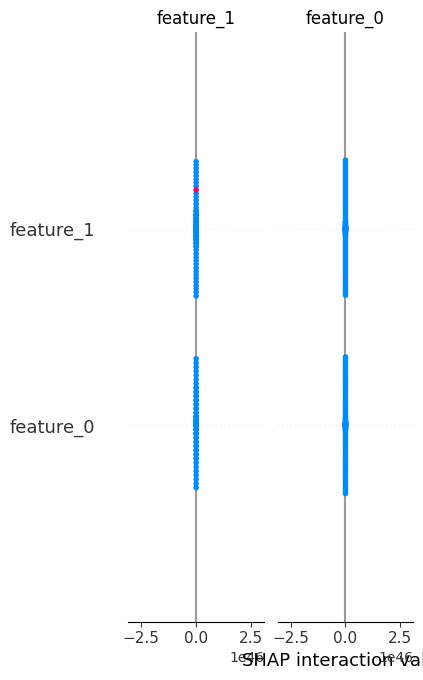

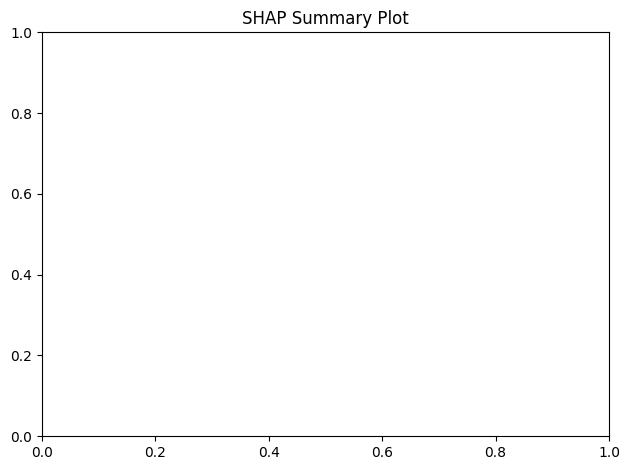

In [9]:
# -----------------------------
# 2. SHAP
# -----------------------------

import shap
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load model
model = joblib.load("../models/random_forest_model.pkl")

# Load test data
X_test, y_test = joblib.load("../data/X_test_y_test.pkl")

# Sample some data
X_sample = X_test[:100]
X_sample_dense = X_sample.toarray() if hasattr(X_sample, 'toarray') else X_sample

# Feature names
feature_names = [f"feature_{i}" for i in range(X_sample_dense.shape[1])]

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample_dense, check_additivity=False)

# Summary plot (fix list-to-array conversion for feature names)
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_sample_dense, feature_names=np.array(feature_names))
else:
    shap.summary_plot(shap_values, X_sample_dense, feature_names=np.array(feature_names))

plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()


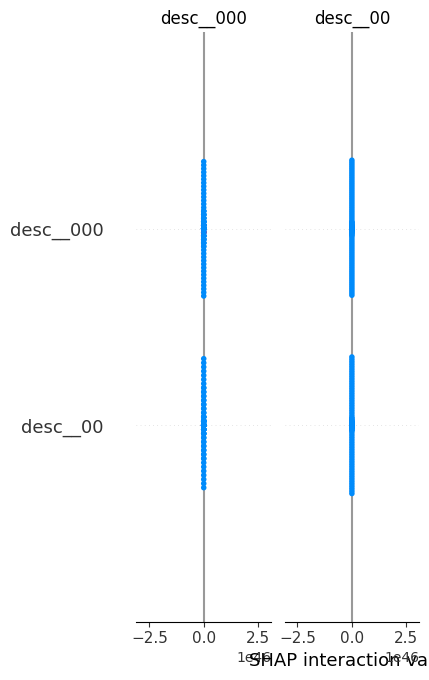

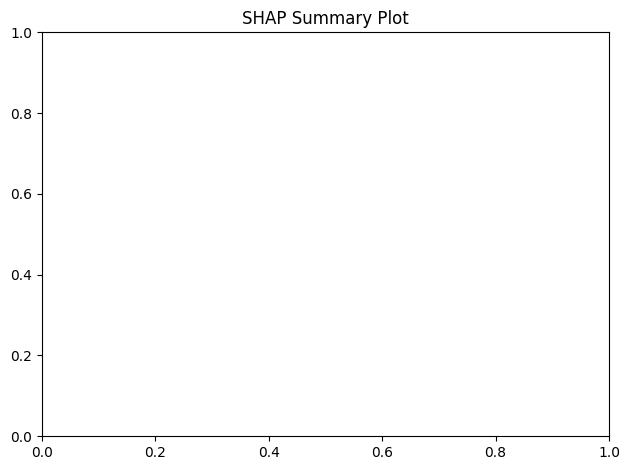

In [1]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load the fitted preprocessor
preprocessor = joblib.load('../models/preprocessor.pkl')

# Get the correct feature names
feature_names = preprocessor.get_feature_names_out()

# Load model
model = joblib.load("../models/random_forest_model.pkl")

# Load test data
X_test, y_test = joblib.load("../data/X_test_y_test.pkl")

# Sample the data and convert to dense array
X_sample = X_test[:100]
X_sample_dense = X_sample.toarray() if hasattr(X_sample, 'toarray') else X_sample

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample_dense, check_additivity=False)

# Summary plot with CORRECT feature names
# Note: You can pass the feature_names list/array directly
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_sample_dense, feature_names=feature_names)
else:
    shap.summary_plot(shap_values, X_sample_dense, feature_names=feature_names)

plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()